In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Exam Stress Final.xlsx",sheet_name=None)

In [3]:
grades=df['Grades']
demography=df['Demography']
eda=df['EDA']
hr=df['HR']
temp=df['Temp']
ibi=df['IBI']

#Q34 Display the Student Demographics and Grades who are born in leap Year

In [4]:
# Merge Demography and Grades based on Student Id
Student_demo_grade_df = pd.merge(demography[['Student_id', 'First Name', 'Last Name','DOB']],
                                 grades[['Student_id','Midterm 1','Midterm 2','final']],
                                 on='Student_id',
                                 how='inner')
#Create and empty List
DOB_leap_year=[]

# Find Student born in a Leap year 
for index, row in Student_demo_grade_df.iterrows():
    if row['DOB'].year % 4 == 0 and row['DOB'].year % 100 !=0  :
        Sid = f"{row}"
        DOB_leap_year.append(Sid)

#print list of  student with their grades born on Leap Year
for List in DOB_leap_year:
    print(List)
    




Student_id                    S04
First Name                   John
Last Name                     Doe
DOB           2008-09-09 00:00:00
Midterm 1                      75
Midterm 2                      77
final                         149
Name: 3, dtype: object
Student_id                    S06
First Name                    Pat
Last Name                  Murray
DOB           2008-04-04 00:00:00
Midterm 1                      71
Midterm 2                      64
final                         175
Name: 5, dtype: object


Q35 Create a Bins of Grades to segregate the students in Grades  'A','B',C'

In [5]:
# Bin creation and label declarations
bins = [0, 150, 175, 200]  
labels = ['C', 'B', 'A']

# Apply the binning to create a new column 'Grade_Category'
grades['Final Grades'] = pd.cut(grades['final'], bins=bins, labels=labels, right=False)

#Print resultset
grades



,Student_id,Midterm 1,Midterm 2,final,Final Grades
0,S01,78,82,182,A
1,S02,82,85,180,A
2,S03,77,90,188,A
3,S04,75,77,149,C
4,S05,67,77,157,B
5,S06,71,64,175,A
6,S07,64,33,110,C
7,S08,92,88,184,A
8,S09,80,39,126,C
9,S10,89,64,116,C


Q36-Create a Word Cloud with First name of Student Names based on thier Race 


In [26]:
pip install wordcloud

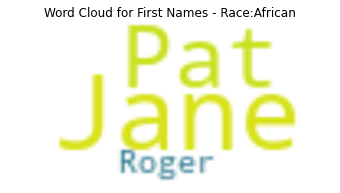

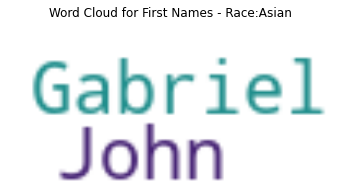

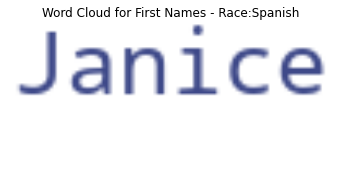

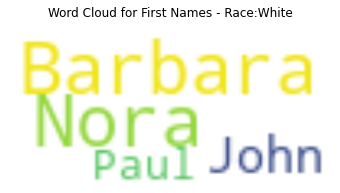

In [28]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
names_by_race = {}

# Group by race and aggregate first names
grouped_by_race = demography.groupby('Race')['First Name'].apply(lambda x: ' '.join(x))

# Create Word Cloud for each race
for race, names in grouped_by_race.items():
    names_by_race[race] = names

    # Generate Word Cloud
    wordcloud = WordCloud(width=100, height=50, background_color='white').generate(names)

    # Display the Word Cloud
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for First Names - Race:{race}' )
    plt.axis('off')
    plt.show()

Q37 Display the student Names and respective grades who has Maximum heart rate


In [6]:
#Merge Demo and Grades sets
Student_demo_grade_df = pd.merge(demography[['Student_id', 'First Name', 'Last Name','DOB']],
                                 grades[['Student_id','Midterm 1','Midterm 2','final']],
                                 on='Student_id',
                                 how='inner')
# Merge Results of merge of Demo and grades to HR
Student_HR_df = pd.merge(Student_demo_grade_df[['Student_id', 'First Name', 'Last Name','Midterm 1','Midterm 2','final']],
                        hr[['Student_id','HR',]],
                        on='Student_id',
                        how='inner')
# grouping of student id and  other common columns  


grouped_data = Student_HR_df.groupby(['Student_id', 'First Name', 'Last Name','Midterm 1','Midterm 2','final'])

# applying Max aggregate  funtion 
max_hr_per_group = grouped_data['HR'].max()

#printing New datafreme
max_hr_per_group



Student_id  First Name  Last Name  Midterm 1  Midterm 2  final
S01         Barbara     Walters    78         82         182      190.713
S02         Nora        Jones      82         85         180      196.847
S03         Gabriel     Willows    77         90         188      194.839
S04         John        Doe        75         77         149      199.278
S05         Jane        Doe        67         77         157      198.272
S06         Pat         Murray     71         64         175      199.156
S07         Roger       Frederick  64         33         110      186.544
S08         John        Wills      92         88         184      192.261
S09         Paul        Cartney    80         39         126      197.741
Name: HR, dtype: float64

Q38 Write a Python program to get the number of occurrences of a specified element in the array.

In [32]:
# Use the count method to get the number of occurrences
def count_occurrences(arr, element):
    
    occurrences = arr.count(element)

# Example
test_array = [1, 2, 3, 4, 2, 2, 5, 6, 2]

specified_element = 2
occurences = test_array.count(2)

print(f'The element {specified_element} occurs {occurences} times in the array.')

The element 2 occurs 4 times in the array.


Q39 Create a 3D list using nested for loops.

In [34]:
x = 2
y = 2
z = 2
TD_list = []
#create 3D list


for i in range(x):
    TD_list.append([])
#add `x` empty lists to the 3D list

    for j in range(y):
        TD_list[i].append([])
#add `y` empty lists to each of the `x` lists

        for k in range(z):
            TD_list[i][j].append(0)
#add initial value of `0` to the innermost list


print(TD_list)

[[[0, 0], [0, 0]], [[0, 0], [0, 0]]]


Q 40- "Array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

Display each row of this array as a separate slice"


In [35]:
array = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

for x in array:
    print(x)
    

[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


Q41 Find the Student name and the Exam who has the Temprature '36.042'


In [36]:

# Merge Demo to Temp
Student_Temp_df = pd.merge(demography[['Student_id', 'First Name', 'Last Name','DOB']],
                        temp[['Student_id','TEMP','Exam']],
                        on='Student_id',
                        how='inner')
Result_df=  Student_Temp_df[Student_Temp_df['TEMP'] == 36.042]


print("Students with temperature of 36.042 degrees:")
print (Result_df)

Students with temperature of 36.042 degrees:
    Student_id First Name Last Name        DOB    TEMP   Exam
921        S02       Nora     Jones 2009-02-02  36.042  final


Q 42-Using arrays and loops, find the count of students based on gender.


In [37]:
genders = demography['Gender'].tolist()
m_c = 0
f_c = 0

for x in genders:
    if x == 'M':
        m_c += 1
    elif x == 'F':
        f_c += 1

print(f"Male Count: {m_c}")
print(f"Female Count: {f_c}")

Male Count: 5
Female Count: 5


Q46 Find the Grade of a Student whose Name ends with 'S'


In [7]:
#Merge Demo and Grades sets
Student_name_grade_df = pd.merge(demography[['Student_id', 'First Name', 'Last Name','DOB']],
                                 grades[['Student_id','Midterm 1','Midterm 2','final']],
                                 on='Student_id',
                                 how='inner')
filtered_students = Student_name_grade_df[Student_name_grade_df['Last Name'].str.endswith('s')]
filtered_students

,Student_id,First Name,Last Name,DOB,Midterm 1,Midterm 2,final
0,S01,Barbara,Walters,2009-01-01,78,82,182
1,S02,Nora,Jones,2009-02-02,82,85,180
2,S03,Gabriel,Willows,2009-07-12,77,90,188
7,S08,John,Wills,2009-03-03,92,88,184


Q48-Find the Full Name of the student who has Max HR


In [8]:

Student_demo_hr_df = pd.merge(demography[[ 'First Name', 'Last Name','Student_id']],
                              hr[['Student_id','HR',]],
                              on='Student_id',
                              how='inner')
max_hr_student = Student_demo_hr_df.loc[Student_demo_hr_df['HR'].idxmax()]
max_hr_student

First Name       John
Last Name         Doe
Student_id        S04
HR            199.278
Name: 2720, dtype: object

Q 43-Generate Unique Student ID  using Lamda Function.


In [61]:
import uuid

#  generating  unique student IDs for 7 students
students_new = 7

generate_student_id = lambda: str(uuid.uuid4())[:6]

# Generate unique student IDs
unique_student_ids = [generate_student_id() for _ in range(students_new)]

# Print the result
print(unique_student_ids)

['3d9dd8', '2c86fb', 'b8ff55', 'a593c8', '71df4f', '49c878', '2e5c80']


Q44-Create a Box  plot for HR and Temp



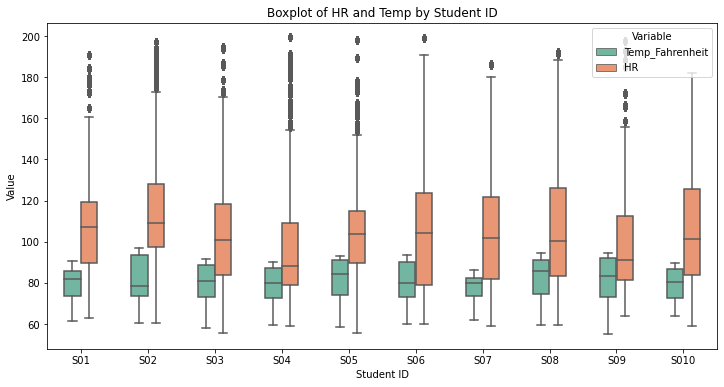

In [60]:
# Melt the DataFrame to long format
temp['Temp_Fahrenheit'] = (temp['TEMP'] * 9/5) + 32


result_data = pd.merge(temp[['Student_id', 'Temp_Fahrenheit']],
                        hr[['Student_id','HR',]],
                        on='Student_id',
                        how='inner')
melted_data = pd.melt(result_data, id_vars='Student_id', var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Student_id', y='Value', hue='Variable', data=melted_data, width=0.5, palette='Set2')
plt.title('Boxplot of HR and Temp by Student ID')
plt.xlabel('Student ID')
plt.ylabel('Value')
plt.legend(title='Variable',loc="upper right")
plt.show()

Q 47-Plot Temp analysis of all students during 1 hr of the exam (x axis time and y axis Temp)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



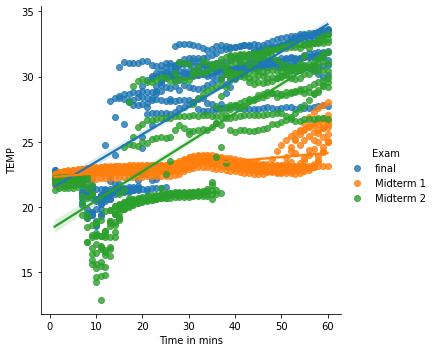

In [91]:
exam_duration = 60
temp_data_60min = temp[temp['Time in mins'] <= exam_duration]
sns.lmplot(x='Time in mins', y='TEMP',hue="Exam", data=temp_data_60min)
plt.show()

Q33 Make a pivot table where Student IDs are the columns and EDA, HR and temp values are the rows


In [194]:
# Sample DataFrames (replace these with your actual DataFrames)
eda1 = pd.DataFrame({'Student_id': ['S01', 'S02', 'S03'],
                    'EDA': [0.5, 0.6, 0.7]})

hr1 = pd.DataFrame({'Student_id': ['S01', 'S02', 'S03'],
                   'HR': [80, 85, 90]})

temp1 = pd.DataFrame({'Student_id': ['S01', 'S02', 'S03'],
                     'Temp': [98.6, 99.0, 98.8]})

# Merge the DataFrames (optional, only needed if they are not already merged)
merged_df = pd.merge(eda1, hr1, on='Student_id')
merged_df = pd.merge(merged_df, temp1, on='Student_id')




p_table = pd.pivot_table(merged_df,index=['Student IT'])
print (p_table)


KeyError: 'Student IT'

In [189]:
import pandas as pd

# Assuming you have DataFrames named hr_df, temp_df, and eda_df
# with 'Student_id' as a common column

# Sample DataFrames
hr_df = pd.DataFrame({'Student_id': ['S01', 'S02', 'S03'],
                      'HR': [80, 85, 90]})



temp_df = pd.DataFrame({'Student_id': ['S01', 'S02', 'S03'],
                        'Temp': [98.6, 99.0, 98.8]})

eda_df = pd.DataFrame({'Student_id': ['S01', 'S02', 'S03'],
                       'EDA': [0.5, 0.6, 0.7]})


# Melt the DataFrames
hr_melted = pd.melt(hr_df, id_vars=['Student_id'], var_name='Metric', value_name='Value')

print(hr_melted)

temp_melted = pd.melt(temp_df, id_vars=['Student_id'], var_name='Metric', value_name='Value')
eda_melted = pd.melt(eda_df, id_vars=['Student_id'], var_name='Metric', value_name='Value')

# Concatenate the melted DataFrames
result_df = pd.concat([hr_melted, temp_melted, eda_melted], ignore_index=True)
#result_df
# Pivot the DataFrame
pivot_table = result_df.pivot(index='Student_id', columns='Metric', values='Value').reset_index()

print(pivot_table)


  Student_id Metric  Value
0        S01     HR     80
1        S02     HR     85
2        S03     HR     90
Metric Student_id  EDA    HR  Temp
0             S01  0.5  80.0  98.6
1             S02  0.6  85.0  99.0
2             S03  0.7  90.0  98.8
